In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False


class Check(object):
    
    
    def __init__(self, path, exclude={'Province', 'name', 'county','county_1986', 'year', 'd', '服用药物_Unit',
         '结扎_Unit', '结扎男_Unit', '结扎女_Unit', '引产_Unit', '放环_Unit', '人流_Unit', '节育_Unit',
        '节育男_Unit', '节育女_Unit', '工资总额_Unit', '工资总额全民_Unit', '工资总额集体_Unit', '人口密度_Unit',
        '职工平均工资集体_Unit', '职工平均工资全民_Unit', '职工平均工资_Unit','总户数_Unit', '总人口_Unit'}, 
                 units={('county', 'county_1986'),
                 ('人口密度', '人口密度_Unit'),
                 ('人流', '人流_Unit'),
                 ('工资总额', '工资总额_Unit'),
                 ('工资总额全民', '工资总额全民_Unit'),
                 ('工资总额集体', '工资总额集体_Unit'),
                 ('引产', '引产_Unit'),
                 ('总人口', '总人口_Unit'),
                 ('总户数', '总户数_Unit'),
                 ('放环', '放环_Unit'),
                 ('服用药物', '服用药物_Unit'),
                 ('结扎', '结扎_Unit'),
                 ('结扎女', '结扎女_Unit'),
                 ('结扎男', '结扎男_Unit'),
                 ('职工平均工资', '职工平均工资_Unit'),
                 ('职工平均工资全民', '职工平均工资全民_Unit'),
                 ('职工平均工资集体', '职工平均工资集体_Unit'),
                 ('节育', '节育_Unit'),
                 ('节育女', '节育女_Unit'),
                 ('节育男', '节育男_Unit')}, 
                 id_column=['name','county','year'], 
                 items='county', 
                 index='year'):
                    self.path = path
                    self.exclude = exclude
                    self.units = units
                    self.id_column = id_column
                    self.items = items
                    self.index = index
                    self.data =  pd.read_excel(self.path)
        

        
    def check_type(self):
        
        for column in set(self.data.columns.values).difference(self.exclude):
            if any(self.data[column].notnull()):
                if str in set(self.data[column].apply(type)):
                    print(column)
            
 
            
    def check_type_print(self):
        for column in set(self.data.columns.values).difference(self.exclude):
            if any(self.data[column].notnull()):
                for i, cell in self.data[column].iteritems():
                    if type(cell) == str:
                        print(list(self.data.iloc[i][self.id_column+[column]]), column)



                    
    def check_missing_unit(self):
        for var, unit in self.units:
            if any(self.data[var].notnull() & self.data[unit].isnull()):
                print(var)
                
                
                
    def plot(self, county, var):
        self.data[['year',var]][self.data['county'] == county].plot.scatter(x='year', y=var, color='blue')
        plt.show()


 
    def plot_all(self):
            for item in set(self.data[self.items]):
                for column in set(self.data.columns.values).difference(self.exclude):
                    if any(self.data[column][self.data[self.items] == item].notnull()):
                        try:
                            self.data[[self.index, column]][self.data[self.items] == item].plot.scatter(x=self.index, y=column, color='blue')
                            plt.show()
                            print(item)
                        except KeyError and ValueError:
                            pass
                



    def show_data(self, item, column):
        return self.data[[self.index, column]][self.data[self.items] == item]
        
    
    
    def correct_data(self, item, value_index, var, value):
        self.data.loc[(self.data[self.items] == item) & (self.data[self.index] == value_index), var] = value
        print('this entry has been corrected')
        
    def export_data(self, export_path):
        self.data.to_excel(export_path, index=False)






In [27]:

date=1019
name='zirui'
p = Check('/Users/francis/Downloads/data_entry_{0}_{1}.xlsx'.format(date, name))

In [28]:
p.check_type_print()

['王梓瑞', '临武县', 1983, '6..50'] 死亡率
['zirui', '平武县', 1954, '4抑'] 死亡人口


In [29]:
p.check_missing_unit()

总户数
结扎女
放环
结扎男
节育
总人口


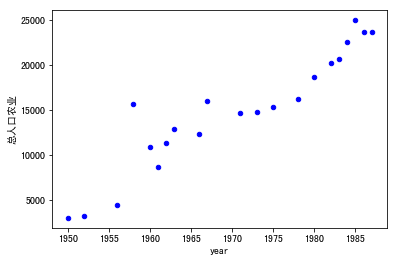

临武县


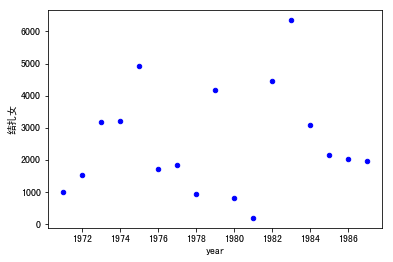

临武县


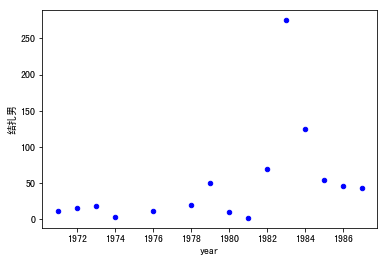

临武县


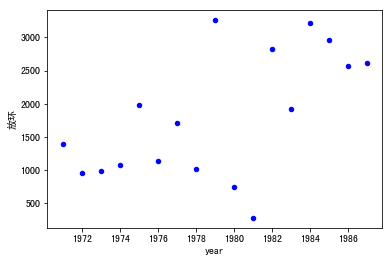

临武县


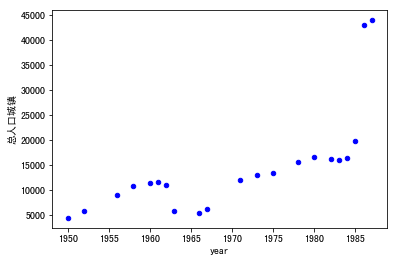

临武县


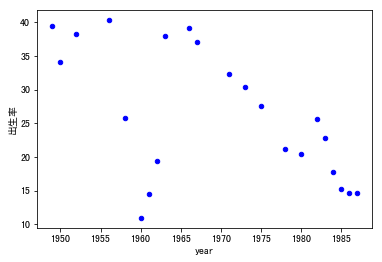

临武县


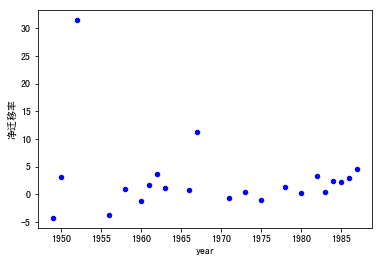

临武县


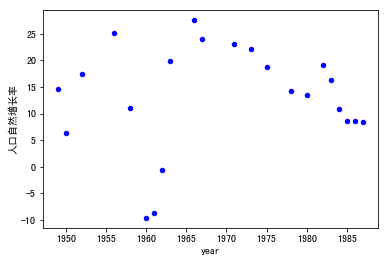

临武县


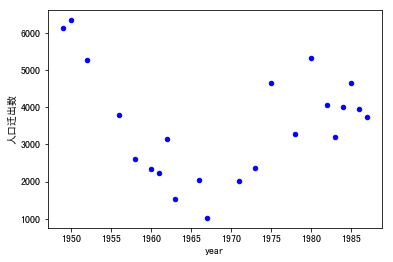

临武县


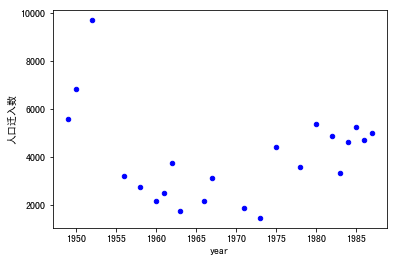

临武县


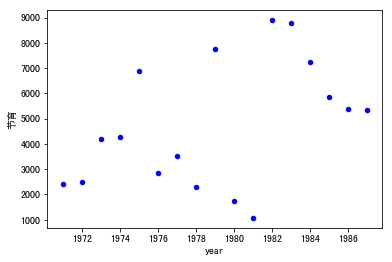

临武县


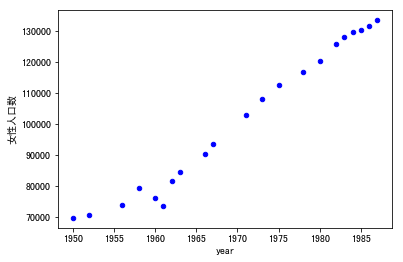

临武县


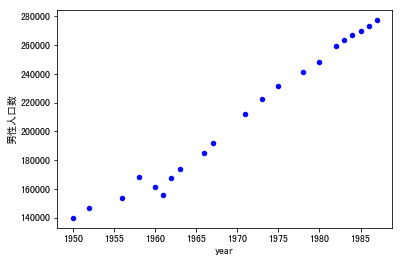

临武县


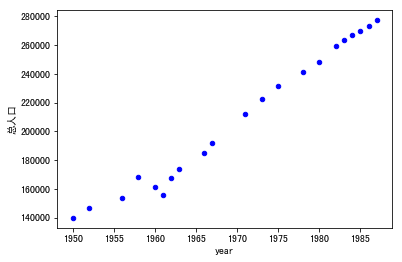

临武县


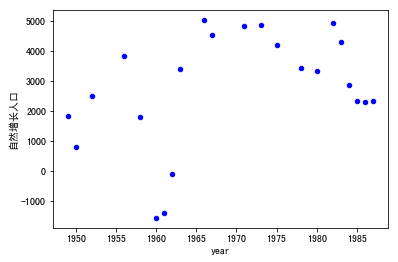

临武县


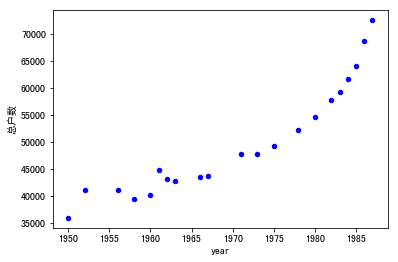

临武县


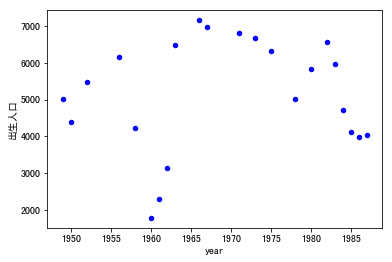

临武县


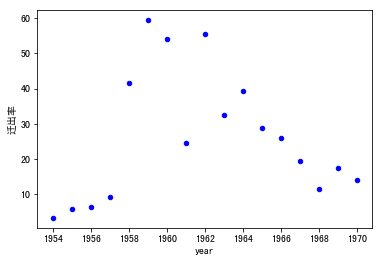

平武县


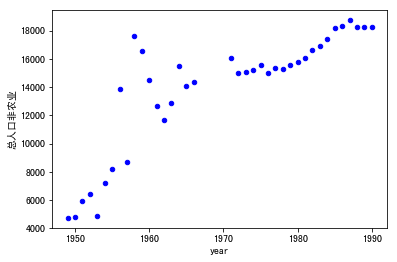

平武县


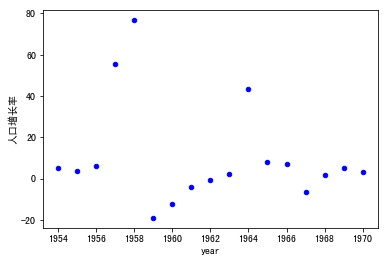

平武县


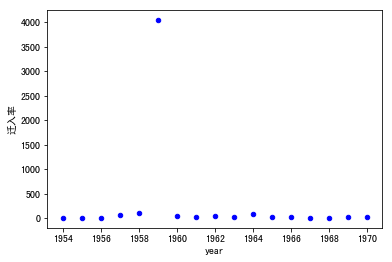

平武县


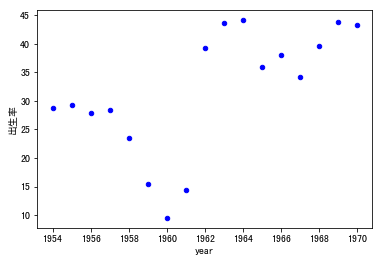

平武县


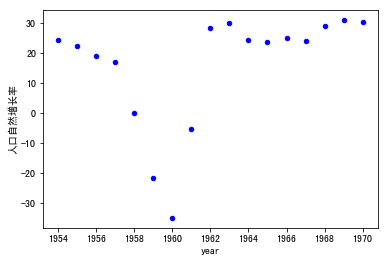

平武县


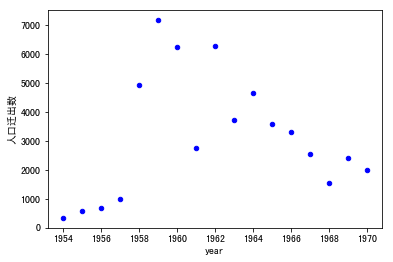

平武县


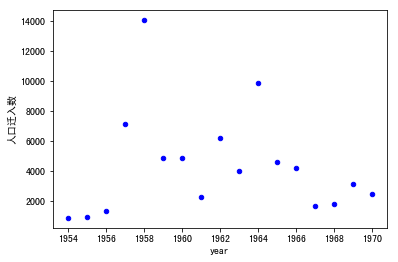

平武县


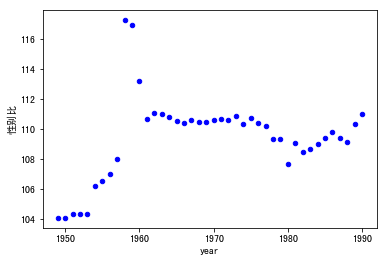

平武县


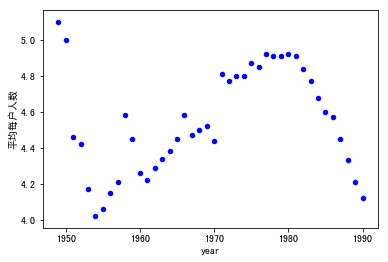

平武县


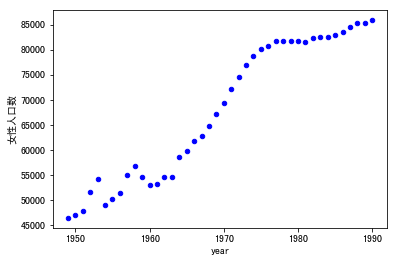

平武县


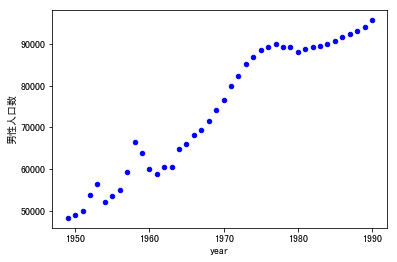

平武县


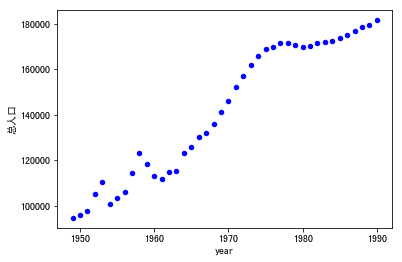

平武县


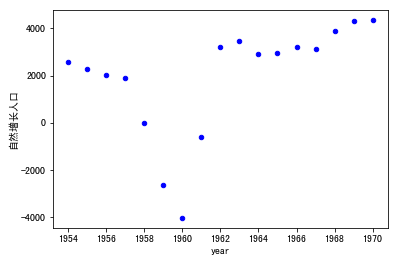

平武县


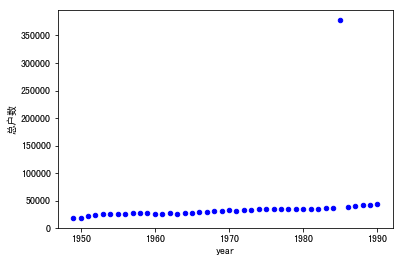

平武县


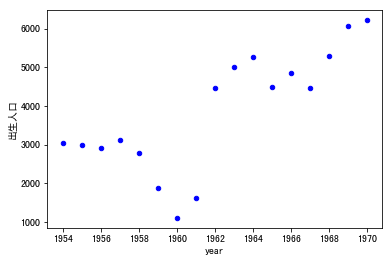

平武县


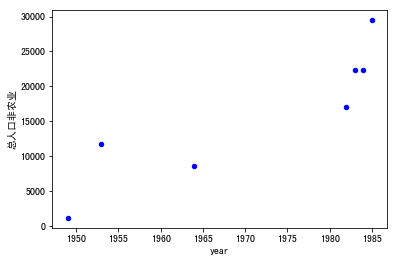

登封县


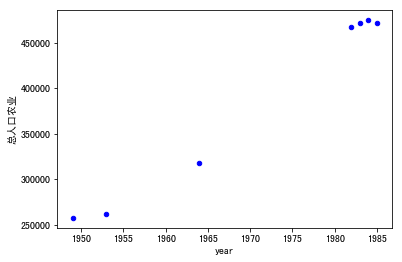

登封县


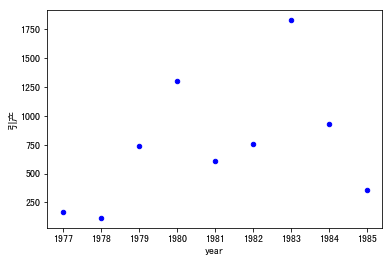

登封县


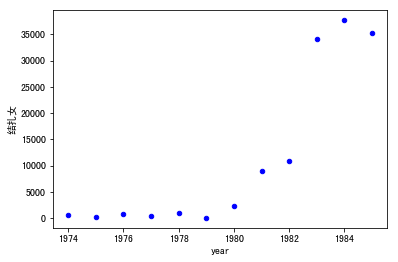

登封县


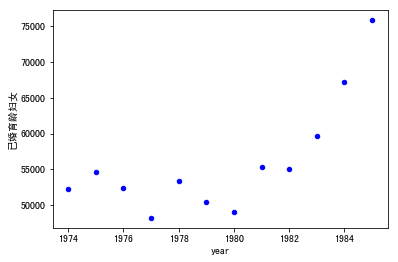

登封县


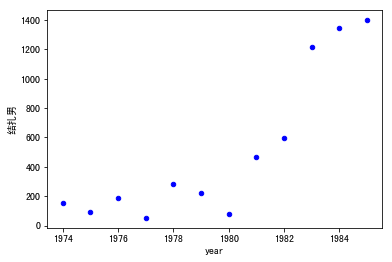

登封县


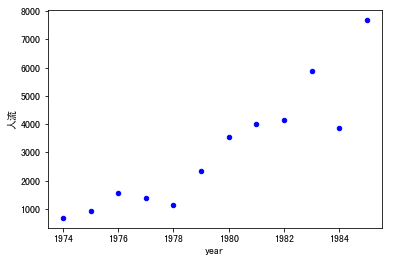

登封县


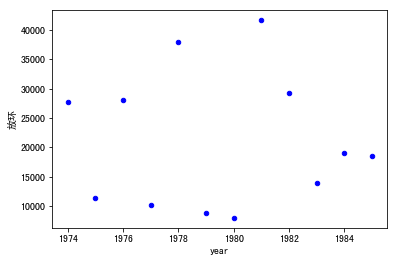

登封县


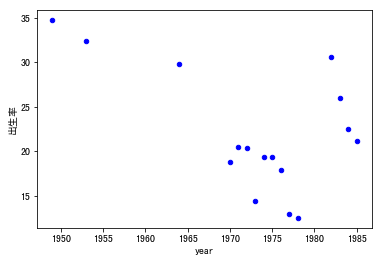

登封县


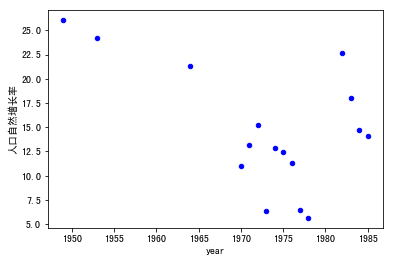

登封县


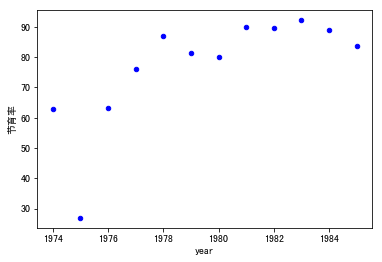

登封县


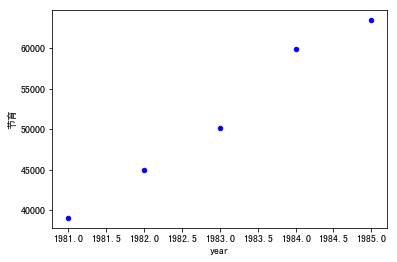

登封县


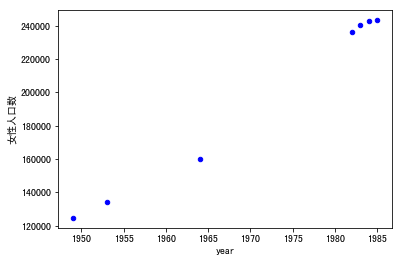

登封县


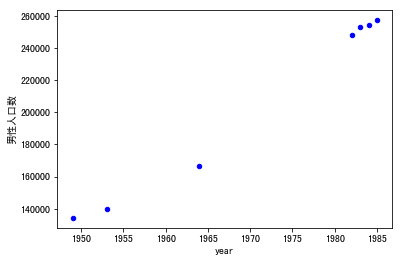

登封县


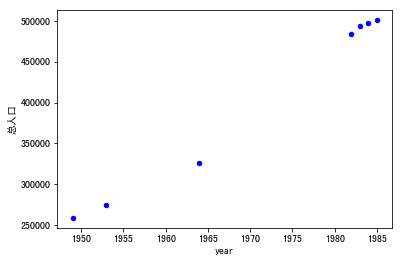

登封县


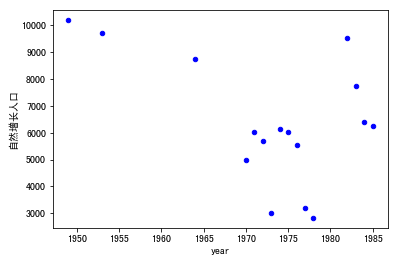

登封县


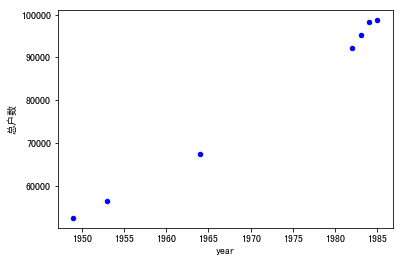

登封县


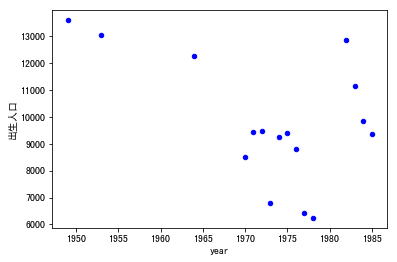

登封县


In [30]:
p.plot_all()

In [ ]:
p.plot('县名', '变量')

In [ ]:
p.show_data()

In [ ]:
p.correct_data('县名', '年份', '变量', '正确值')

In [ ]:
p.export_data('/Users/canghai/...')

In [ ]:

from Check import *

date= #date
name= #name
p = Check('/Users/.../data_entry_{0}_{1}.xlsx'.format(date, name))


p.check_type_print()

p.check_missing_unit()

p.plot_all()

p.show_data(county, variable)

p.correct_data(county, year, variable, correct_value)

p.export_data('/Users/...')

